# Cleaning and pre-processing dataset

In [1]:
# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [2]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

import nltk
import gensim

In [3]:
# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
# Plotly imports
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [5]:
import nltk
import pandas as pd
import numpy as np

In [6]:
# Other imports
from collections import Counter
from scipy.misc import imread
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [7]:
# IMPORTING ALL THE NECESSARY LIBRARIES AND PACKAGES
from nltk.corpus import stopwords
import string
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import learning_curve, GridSearchCV

In [8]:
# LOADING THE DATASET AND SEEING THE DETAILS
data = pd.read_csv('train.csv')

In [9]:
data.head()

,sentiment,text
0,5,@manjulamartin @Kirk_Gleason Except trains are...
1,5,I want a Google driverless car.
2,5,@Oatmeal @google driverless @TeslaMotors ? Ooo...
3,5,SO MUCH AWESOME! Amazing video for GoogleÌ¢‰âÂ...
4,5,@google is making driverless cars which is awe...


In [10]:
y=data['sentiment']
y[0:3]

0    5
1    5
2    5
Name: sentiment, dtype: int64

In [11]:
# for showing word data, we make a separate feature
tweet_text=data['text']

In [12]:
all_words = tweet_text.str.split(expand=True).unstack().value_counts()
data = [go.Bar(
            x = all_words.index.values[2:50],
            y = all_words.values[2:50],
            marker= dict(colorscale='Jet',
                         color = all_words.values[2:100]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Top 50 (Uncleaned) Word frequencies in the dataset'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

# Preprocessing and cleaning

# All in one step

In [13]:
df = pd.read_csv('train.csv')
df.head()

,sentiment,text
0,5,@manjulamartin @Kirk_Gleason Except trains are...
1,5,I want a Google driverless car.
2,5,@Oatmeal @google driverless @TeslaMotors ? Ooo...
3,5,SO MUCH AWESOME! Amazing video for GoogleÌ¢‰âÂ...
4,5,@google is making driverless cars which is awe...


In [14]:
import re
from nltk.stem import WordNetLemmatizer
tweets = [] # defining corpus
for i in range(0, len(df['text'])): # giving range of values from 0 to 1000
    tweet = re.sub('[^a-zA-Z]', ' ', df['text'][i]) # using i for all values instead of 1 column
    tweet = tweet.lower()
    tweet = tweet.split()
    lemm = WordNetLemmatizer()
    stopword_set = set(stopwords.words('english'))
    tweet = [lemm.lemmatize(word) for word in tweet if not word in stopword_set]
    tweet = ' '.join(tweet)
    tweets.append(tweet) # finally attach all these cleaned values to corpus directory

# Alternative method

In [15]:
"""
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re

top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df_usa['title'] for r in v)

a = data_exp['text'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]        

# Calculate frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

"""

'\nfrom collections import Counter\nfrom nltk.tokenize import RegexpTokenizer\nfrom stop_words import get_stop_words\nimport re\n\ntop_N = 100\n#convert list of list into text\n#a=\'\'.join(str(r) for v in df_usa[\'title\'] for r in v)\n\na = data_exp[\'text\'].str.lower().str.cat(sep=\' \')\n\n# removes punctuation,numbers and returns list of words\nb = re.sub(\'[^A-Za-z]+\', \' \', a)\n\n#remove all the stopwords from the text\nstop_words = list(get_stop_words(\'en\'))         \nnltk_words = list(stopwords.words(\'english\'))   \nstop_words.extend(nltk_words)\n\nword_tokens = word_tokenize(b)\nfiltered_sentence = [w for w in word_tokens if not w in stop_words]\nfiltered_sentence = []\nfor w in word_tokens:\n    if w not in stop_words:\n        filtered_sentence.append(w)\n\n# Remove characters which have length less than 2  \nwithout_single_chr = [word for word in filtered_sentence if len(word) > 2]\n\n# Remove numbers\ncleaned_data_title = [word for word in without_single_chr if not

In [16]:
# Remove characters which have length less than 2  
tweets_len = [word for word in tweets if len(word) > 2]

In [17]:
# Remove numbers
cleaned_data = [word for word in tweets_len if not word.isnumeric()]  

In [18]:
type(cleaned_data)

list

In [19]:
# convert to series to check words
tweets_corpus = pd.Series(cleaned_data)

In [20]:
df['cleaned'] = tweets_corpus
df.head()

,sentiment,text,cleaned
0,5,@manjulamartin @Kirk_Gleason Except trains are...,manjulamartin kirk gleason except train capita...
1,5,I want a Google driverless car.,want google driverless car
2,5,@Oatmeal @google driverless @TeslaMotors ? Ooo...,oatmeal google driverless teslamotors ooooh wo...
3,5,SO MUCH AWESOME! Amazing video for GoogleÌ¢‰âÂ...,much awesome amazing video google next phase d...
4,5,@google is making driverless cars which is awe...,google making driverless car awesome http co h...


## comparing clean and uncleaned data-points

In [21]:
random_text= df['text'][0]
print(random_text)
print("="*90)
print(df['cleaned'][0])

@manjulamartin @Kirk_Gleason Except trains are very capital intensive and have limited mobility. Driverless cars are the best of both worlds
manjulamartin kirk gleason except train capital intensive limited mobility driverless car best world


In [22]:
random_text= df['text'][19]
print(random_text)
print("="*90)
print(df['cleaned'][19])

#SKYNET Ì¢‰âÂÒ@SheriJo: I am for driverless cars. Sick of the accidents, injuries, deaths, people driving recklessly all the time. It must stop.Ì¢‰âÂå
skynet sherijo driverless car sick accident injury death people driving recklessly time must stop


In [23]:
random_text= df['text'][57]
print(random_text)
print("="*90)
print(df['cleaned'][57])

#Google 's stocks are already skyrocketing, now the driverless are approved in CA !
google stock already skyrocketing driverless approved ca


In [24]:
df.to_csv('train_self_drive_clean.csv', index= False, encoding= 'utf-8')

# word features

In [25]:
from wordcloud import WordCloud, STOPWORDS
stopwords=set(STOPWORDS)

def Mywordcloud (data, title=None):
    wordcloud=WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words= 100 ,
    max_font_size=40 ,
    scale=3,
    random_state=1
    ).generate(str(data))
    
    fig=plt.figure(1 , figsize(20, 20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    
    plt.imshow(wordcloud)
    plt.show()

================================================== Uncleaned_data ==================================================


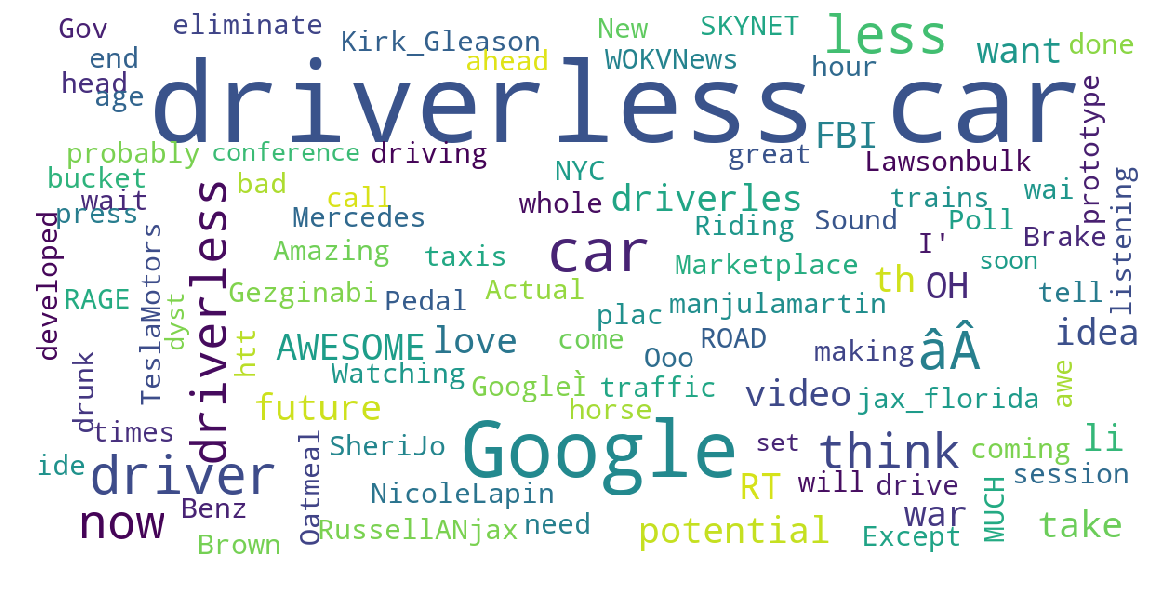

================================================== Cleaned_data ==================================================


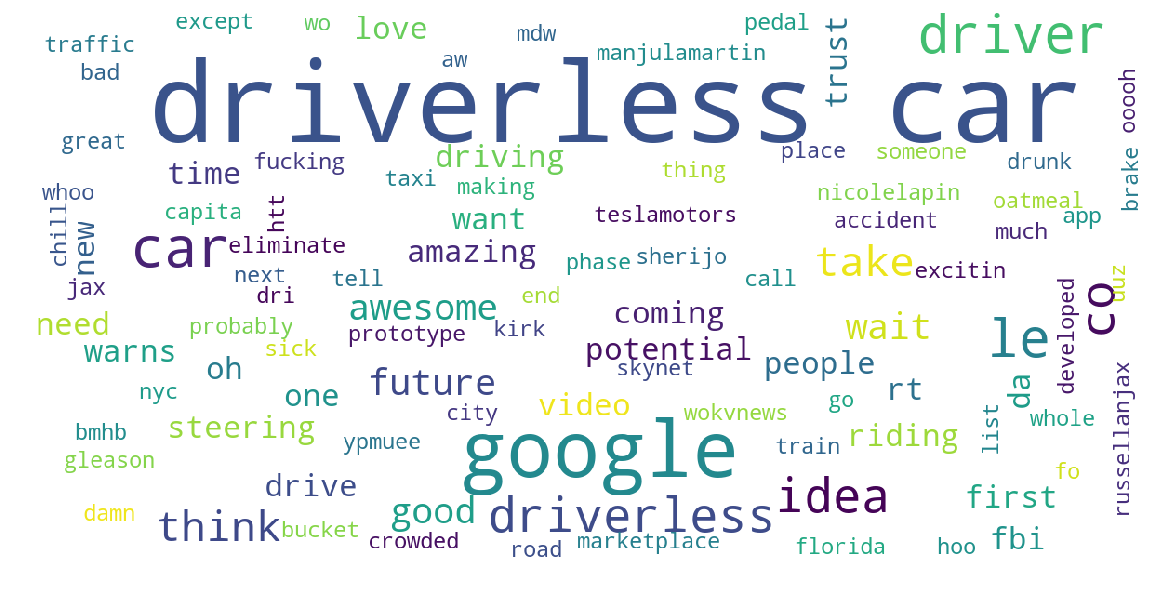

In [26]:
print("="*50, "Uncleaned_data", "="*50)
Mywordcloud(df['text'].dropna())
print("="*50, "Cleaned_data", "="*50)
Mywordcloud(df['cleaned'].dropna())

## Applying TF-IDF model

In [27]:
# Define helper function to print top words
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}:".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*70)

In [28]:
lemm = WordNetLemmatizer()
class LemmaCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(LemmaCountVectorizer, self).build_analyzer()
        return lambda doc: (lemm.lemmatize(w) for w in analyzer(doc))

In [29]:
# Storing the entire training text in a list
text = list(df.cleaned.values)
# Calling our overwritten Count vectorizer
tf_vectorizer = LemmaCountVectorizer(max_df=0.95, 
                                     min_df=2,
                                     stop_words='english',
                                     decode_error='ignore')
tf = tf_vectorizer.fit_transform(text)

In [30]:
feature_names = tf_vectorizer.get_feature_names()
count_vec = np.asarray(tf.sum(axis=0)).ravel()
zipped = list(zip(feature_names, count_vec))
x, y = (list(x) for x in zip(*sorted(zipped, key=lambda x: x[1], reverse=True)))
# Now I want to extract out on the top 15 and bottom 15 words
Y = np.concatenate([y[0:15], y[-16:-1]])
X = np.concatenate([x[0:15], x[-16:-1]])

# Plotting the Plot.ly plot for the Top 50 word frequencies
data = [go.Bar(
            x = x[0:50],
            y = y[0:50],
            marker= dict(colorscale='Jet',
                         color = y[0:50]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Top 50 Word frequencies after Preprocessing'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

# Plotting the Plot.ly plot for the Top 50 word frequencies
data = [go.Bar(
            x = x[-100:],
            y = y[-100:],
            marker= dict(colorscale='Portland',
                         color = y[-100:]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Bottom 100 Word frequencies after Preprocessing'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')